**Problem Statement**

Problem Description : To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.


Forecasting is an important approach to take an optimal decision and implement appropriate action plans. A major non-life insurance company wants to evaluate customer life time value based on each customer’s demographics and policy information including claim details. The CLV is a profitability metric in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value.

You are expected to create an analytical and modelling framework to predict the life time value of each customer based on the quantitative and qualitative features provided in the dataset and also cluster the train dataset to understand behaviour of each segment.

Importing relevant packages and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Train Dataset


In [2]:
train=pd.read_csv("/kaggle/input/customer-life-time-value/train-1574429526318.csv")
train.head()


,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


EDA

In [3]:
train['Income']=train['Income'].replace('?', np.NaN)

In [4]:
train['Income']=pd.to_numeric(train['Income'])


In [5]:
train['Income']

0           0.0
1       63357.0
2       64125.0
3       67544.0
4       19651.0
         ...   
9801        0.0
9802    72421.0
9803    74665.0
9804    91763.0
9805    18017.0
Name: Income, Length: 9806, dtype: float64

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Customer.Lifetime.Value'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Monthly.Premium.Auto'}>,
        <AxesSubplot:title={'center':'Months.Since.Last.Claim'}>,
        <AxesSubplot:title={'center':'Months.Since.Policy.Inception'}>],
       [<AxesSubplot:title={'center':'Number.of.Open.Complaints'}>,
        <AxesSubplot:title={'center':'Number.of.Policies'}>,
        <AxesSubplot:title={'center':'Total.Claim.Amount'}>],
       [<AxesSubplot:title={'center':'Vehicle.Size'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

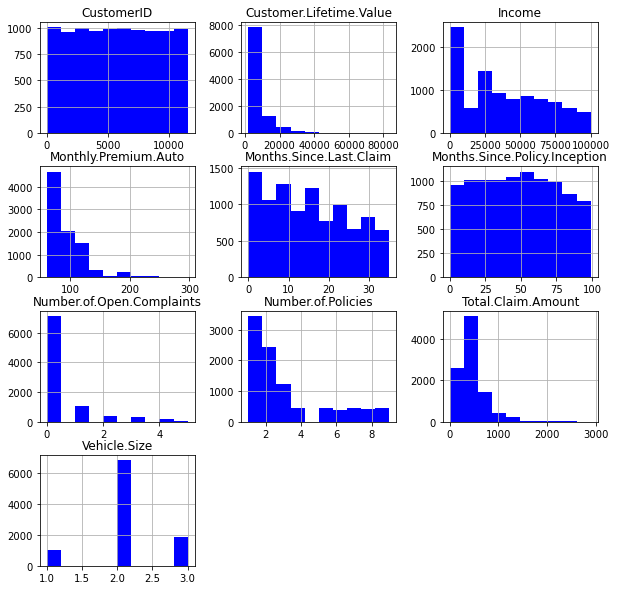

In [6]:
train.hist(figsize=(10,10),color="b")

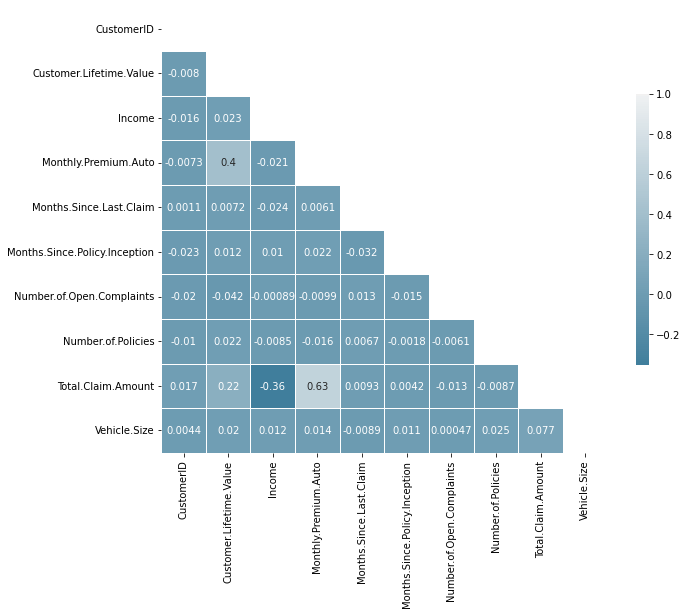

In [7]:
f, ax = plt.subplots(figsize=(10,10))
mat = train.corr('pearson')#numpy.triu(a, k = 0) : Returns copy of array with upper part of the triangle w.r.t k
mask = np.triu(np.ones_like(mat, dtype=bool))#function returns an array of given shape and type as a given array, with ones.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=1, annot = True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Preprocessing

In [8]:
x=train.drop(['Customer.Lifetime.Value','Location.Code','Location.Geo','Vehicle.Size'],axis=1)
y=train['Customer.Lifetime.Value']

In [9]:
new=x.drop('CustomerID',axis=1)

Dividing Numerical values and Categorical

In [10]:
numeric=new._get_numeric_data()                             
#numeric.info()
cat_train=new.drop(numeric,axis=1)
cat_train=cat_train.astype('category')
numeric.head()

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
0,0.0,67.0,2,33,NaN,2.0,267.214383
1,63357.0,101.0,26,42,0.0,5.0,565.508572
2,64125.0,108.0,3,44,0.0,3.0,369.818708
3,67544.0,116.0,2,15,NaN,3.0,556.800000
4,19651.0,72.0,3,68,0.0,5.0,345.600000


In [11]:
cat_train.columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital.Status',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class'],
      dtype='object')

In [12]:
cat_cols=['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital.Status',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class']

Fill numerical null values with mean

In [13]:
numeric=numeric.fillna(numeric.mean())

In [14]:
numeric.isnull().sum()

Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
dtype: int64

Imputing cat null values with Most_frequent

In [15]:
#cat_train=cat_train.fillna(cat_train.mode())
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='most_frequent')
m=im.fit_transform(cat_train)

In [16]:
m.shape

(9806, 10)

In [17]:
cat_train=pd.DataFrame(m,columns=cat_cols)

In [18]:
cat_train.isnull().sum()

Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Marital.Status      0
Policy.Type         0
Policy              0
Renew.Offer.Type    0
Sales.Channel       0
Vehicle.Class       0
dtype: int64

In [19]:
cat_train.shape

(9806, 10)

Convert cat variables in to num variable

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True)

result = ohe.fit_transform(cat_train).toarray()
result.shape
#print(ohe.categories_)
#print(result)

(9806, 44)

In [21]:
cat=pd.DataFrame(result,columns=ohe.get_feature_names_out())
cat.shape

(9806, 44)

In [22]:
x=pd.concat([cat,numeric],axis=1)
x.shape

(9806, 51)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2323)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6864, 51)
(2942, 51)
(6864,)
(2942,)


In [24]:
x_train.head()

,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Disabled,EmploymentStatus_Employed,...,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
4404,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,74015.0,72.0,12,61,0.000000,6.000000,471.443077
356,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,124.0,2,85,0.000000,2.000000,928.817071
9652,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13088.0,82.0,29,77,0.379172,3.000000,393.600000
7371,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,34919.0,78.0,0,82,0.000000,2.960351,344.767795
7942,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24910.0,63.0,7,63,1.000000,1.000000,347.857619


In [25]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
train=model.fit(x_train,y_train)

In [26]:
predtrain=model.predict(x_train)
predtest=model.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,predtest)))


RMSE for train: 6342.383862505862
RMSE for test: 6038.47780033619


In [29]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor()
r.fit(x_train,y_train)
r_predtest=r.predict(x_test)
r_predtrain=r.predict(x_train)

In [30]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,r_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,r_predtest)))

RMSE for train: 1505.1824579445413
RMSE for test: 3735.0358979282996


In [31]:
from sklearn.neighbors import KNeighborsRegressor
k=KNeighborsRegressor()
k.fit(x_train,y_train)
k_predtest=k.predict(x_test)
k_predtrain=k.predict(x_train)

In [32]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,k_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,k_predtest)))

RMSE for train: 5577.311864801577
RMSE for test: 6451.928473463964


In [33]:
from sklearn.tree import DecisionTreeRegressor

d=DecisionTreeRegressor()
d.fit(x_train,y_train)
d_predtest=d.predict(x_test)
d_predtrain=d.predict(x_train)

In [34]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,d_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,d_predtest)))

RMSE for train: 1.4239314178436154e-13
RMSE for test: 5637.277788527118


In [35]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
ls_predtest=ls.predict(x_test)
ls_predtrain=ls.predict(x_train)


In [36]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,ls_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,ls_predtest)))

RMSE for train: 6342.675002899714
RMSE for test: 6037.841843548606


In [37]:
from sklearn.linear_model import Ridge
r=Ridge()
r.fit(x_train, y_train)
r_predtest=r.predict(x_test)
r_predtrain=r.predict(x_train)


In [38]:
print("RMSE for train:",np.sqrt(mean_squared_error(y_train,r_predtrain)))
print("RMSE for test:",np.sqrt(mean_squared_error(y_test,r_predtest)))

RMSE for train: 6342.395224564514
RMSE for test: 6038.219412196347


Loading test dataset

In [39]:
test=pd.read_csv("/kaggle/input/customer-life-time-value/test-1574429501088.csv")
test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,...,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,...,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize


EDA

In [40]:
Id=test['CustomerID'].values

In [41]:
test.dtypes

CustomerID                         int64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Geo                      object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [42]:
test['Income']=test['Income'].replace('?', np.NaN)
test['Income']=pd.to_numeric(test['Income'])

In [43]:
test=test.drop(['CustomerID','Location.Code','Location.Geo','Vehicle.Size'],axis=1)


In [44]:

numeric_test=test._get_numeric_data()                             
numeric.head()


,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
0,0.0,67.0,2,33,0.379172,2.0,267.214383
1,63357.0,101.0,26,42,0.000000,5.0,565.508572
2,64125.0,108.0,3,44,0.000000,3.0,369.818708
3,67544.0,116.0,2,15,0.379172,3.0,556.800000
4,19651.0,72.0,3,68,0.000000,5.0,345.600000


In [45]:
cat_test=test.drop(numeric,axis=1)
cat_test=cat_test.astype('category')
cat_test.shape

(1767, 10)

In [46]:
cat_cols_test=['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Marital.Status',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class']

imputing num variable with mean

In [47]:
numeric_test=numeric_test.fillna(numeric_test.mean())

imputing cat variable with most_freqent

In [48]:
#cat_train=cat_train.fillna(cat_train.mode())
from sklearn.impute import SimpleImputer
im=SimpleImputer(strategy='most_frequent')
m=im.fit_transform(cat_test)

converting cat variables to num variables

In [49]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True)

result = ohe.fit_transform(cat_test).toarray()
result.shape
#print(ohe.categories_)
#print(result)

(1767, 44)

In [50]:
cat_test=pd.DataFrame(result,columns=ohe.get_feature_names_out())
cat_test.shape

(1767, 44)

In [51]:
df=pd.concat([cat_test,numeric_test],axis=1)
df.shape

(1767, 51)

In [52]:
df.columns

Index(['Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium',
       'Education_Bachelor', 'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Unemployed',
       'Gender_F', 'Gender_M', 'Marital.Status_Divorced',
       'Marital.Status_Married', 'Marital.Status_Single',
       'Policy.Type_Corporate Auto', 'Policy.Type_Personal Auto',
       'Policy.Type_Special Auto', 'Policy.Type_nan', 'Policy_Corporate L1',
       'Policy_Corporate L2', 'Policy_Corporate L3', 'Policy_Personal L1',
       'Policy_Personal L2', 'Policy_Personal L3', 'Policy_Special L1',
       'Policy_Special L2', 'Policy_Special L3', 'Renew.Offer.Type_Offer1',
       'Renew.Offer.Type_Offer2', 'Renew.Offer.Type_Offer3',
       'Renew.Offer.Type_Offer4', 'Sales.Channel_Agent',
       'Sales.Channel_Branch', 'Sales.Channel_Call Center',
      

In [53]:
x_train.columns

Index(['Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium',
       'Education_Bachelor', 'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'EmploymentStatus_Employed',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired',
       'EmploymentStatus_Unemployed', 'Gender_F', 'Gender_M',
       'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Policy.Type_Corporate Auto',
       'Policy.Type_Personal Auto', 'Policy.Type_Special Auto',
       'Policy_Corporate L1', 'Policy_Corporate L2', 'Policy_Corporate L3',
       'Policy_Personal L1', 'Policy_Personal L2', 'Policy_Personal L3',
       'Policy_Special L1', 'Policy_Special L2', 'Policy_Special L3',
       'Renew.Offer.Type_Offer1', 'Renew.Offer.Type_Offer2',
       'Renew.Offer.Type_Offer3', 'Renew.Offer.Type_Offer4',
       'Sales.Channel_Agent', 'Sales.Channel_Branch',
       'Sales.Channel_Call

In [54]:
test_perd=model.predict(df)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Policy.Type_nan
Feature names seen at fit time, yet now missing:
- EmploymentStatus_Retired

  warnings.warn(message, FutureWarning)


In [55]:
test_perd_r=r.predict(df)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Policy.Type_nan
Feature names seen at fit time, yet now missing:
- EmploymentStatus_Retired

  warnings.warn(message, FutureWarning)


In [56]:
sub=pd.DataFrame({"CustomerID":Id,'Customer.Lifetime.Value':test_perd_r})
sub.to_csv("submission1.csv",index=False)


In [57]:
k_predtrain=k.predict(df)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Policy.Type_nan
Feature names seen at fit time, yet now missing:
- EmploymentStatus_Retired

  warnings.warn(message, FutureWarning)


Clustering


In [58]:
from sklearn.cluster import  KMeans

standertizing the daa

In [59]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler().fit_transform(x)
sd
train_std=pd.DataFrame(sd,columns=list(x.columns))

In [60]:

kmeans_object = KMeans(n_clusters=5,random_state=1234)
kmeans_object.fit(train_std)


KMeans(n_clusters=5, random_state=1234)

In [61]:
kmeans_clusters = kmeans_object.predict(train_std
                                        )

ploting Elbow method to recognize no.of clusters

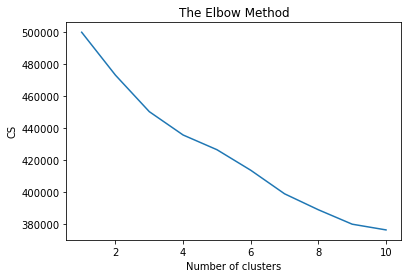

In [62]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =123)
    kmeans.fit(train_std)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [63]:
best_kmeans = KMeans(n_clusters=7,random_state=1234)

In [64]:
best_kmeans.fit(train_std)


KMeans(n_clusters=7, random_state=1234)

In [65]:
best_kmeans_labels = best_kmeans.predict(train_std)
best_kmeans_labels

array([1, 3, 3, ..., 0, 5, 2], dtype=int32)